In [40]:
import numpy as np
import matplotlib.pyplot as plt
from nmf_methods.nmf_son.utils import load_results, plot_and_merge, plot_W_mats, plot_combined_H, plot_separate_H

np.random.seed(42)
np.set_printoptions(precision=3)

In [41]:
# import matplotlib.pyplot as plt
# import matplotlib.patches as patches
#
# # Plot the matrix with imshow
# img = plt.imshow(M_2d, cmap='gray')
#
# # Add a rectangular box around the region of interest
# # rect = patches.Rectangle((60, 0), 40, 50, linewidth=2, edgecolor='r', facecolor='none')
# rect = patches.Rectangle((30, 10), 10, 10, linewidth=2, edgecolor='r', facecolor='none')
# plt.gca().add_patch(rect)
# plt.tight_layout()
#
# # Show the plot
# plt.savefig('../../experimental/nmfson_results/max_rank/outlined_subregion.png')

In [42]:
M = np.load('../datasets/jasper_full.npz')['X']
m, n = M.shape

r = 20
imgsize = (100, 100)
_lam = 750
max_iters = 10000

In [43]:
save_filepath = '../saved_models/jasper/r{}_l{}_mit{}.npz'
W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters))

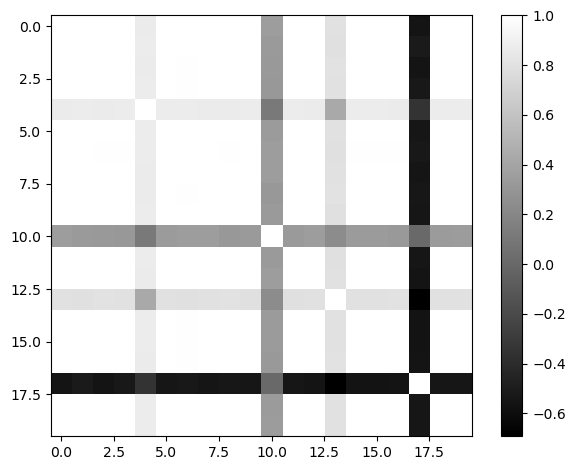

In [44]:
plt.imshow(np.corrcoef(W, rowvar=False), 'gray')
plt.colorbar()
plt.tight_layout()
# plt.savefig('/Users/waqas/Desktop/nmfson_results/jasper_small/correlation_matrix.png')

In [45]:
unique_idxs = [4, 10, 13, 17]
other_idxs = [x for x in range(r) if x not in unique_idxs]

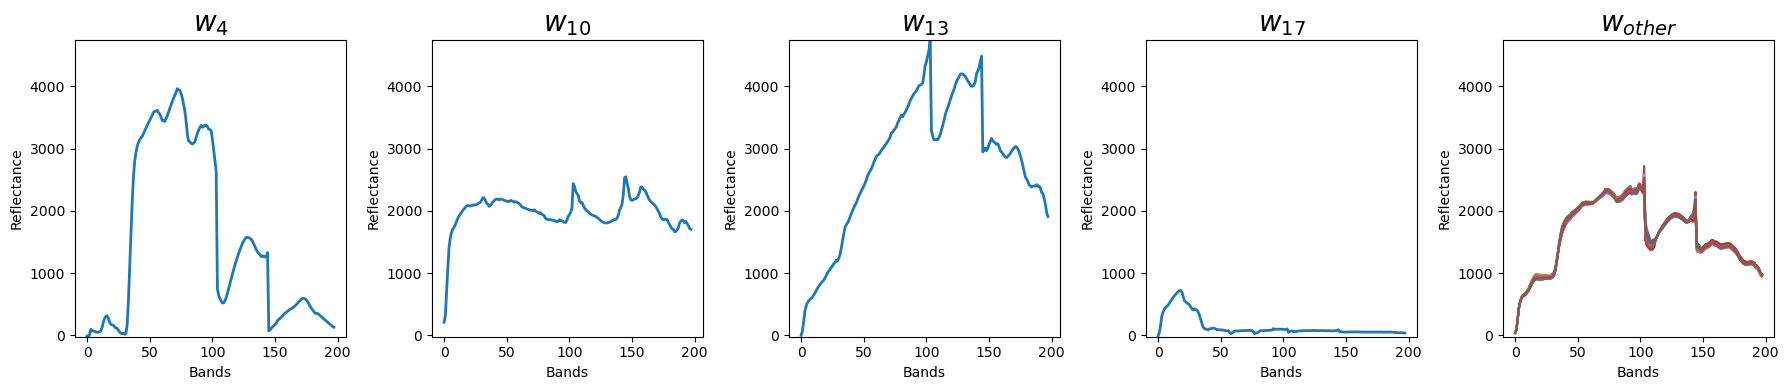

In [58]:
wmin, wmax = np.min(W), np.max(W)


fig, axs = plt.subplots(1, len(unique_idxs) + 1, figsize=(18, 4))
axs = axs.ravel()


for cnt, ax in enumerate(axs):
    ax.set_xlabel('Bands')
    ax.set_ylabel('Reflectance')
    ax.set_ylim([min(0, wmin), wmax])

for ax_idx, w_idx in enumerate(unique_idxs):
    axs[ax_idx].plot(W[:, w_idx], linewidth=2)
    axs[ax_idx].set_title(f'$w_{{{w_idx}}}$', fontsize=20)

axs[-1].plot(W[:, other_idxs], )
axs[-1].set_title('$w_{{other}}$', fontsize=20)

# Adjust layout and display plot
plt.tight_layout()
plt.savefig(f'../final_results/jasper_full_overlapped.png')

In [49]:
# sum
hsum = H[other_idxs, :].sum(axis=0, keepdims=True)
wsum = W[:, other_idxs].sum(axis=1, keepdims=True)

new_W = np.hstack((W[:, unique_idxs], wsum))
new_H = np.vstack((H[unique_idxs, :], hsum))

In [59]:
def plot_W_mats(W, figsize, fontsize, n_rows=1, filename=None, scale_y=False, plot_title=None):
    rank = W.shape[1]
    wmin, wmax = np.min(W), np.max(W)

    n_cols = int(np.ceil(rank / n_rows))
    fig, axs = plt.subplots(n_rows, n_cols, figsize=figsize)
    axs = axs.ravel()

    for cnt, ax in enumerate(axs):
        if cnt < rank:
            ax.plot(W[:, cnt], linewidth=3)
            if scale_y:
                ax.set_ylim([min(0, wmin), wmax])

            ax.set_title(f'$w_{{{cnt + 1}}}$', fontsize=fontsize)
            ax.set_xlabel('Bands')
            ax.set_ylabel('Reflectance')
        else:
            ax.axis('off')

    plt.tight_layout()
    if plot_title:
        fig.suptitle(plot_title, fontsize=25)
    if filename:
        fig.savefig(filename)
        plt.close()

plot_W_mats(new_W, (18,4), 20, n_rows=1, filename='../final_results/jasper_full_summed.png')

In [67]:
from mpl_toolkits.axes_grid1 import make_axes_locatable


def plot_combined_H(H, img_size, figsize, num_rows=1, normalize_row=False, filename=None):
    if normalize_row:
        H /= np.linalg.norm(H, axis=1, keepdims=True)

    H3d = H.reshape(-1, img_size[0], img_size[1], order='F')

    if num_rows > 1:
        num_cols = int(np.ceil(H.shape[0] / num_rows))
        large_mat = np.vstack([np.hstack(H3d[i * num_cols: (i+1) * num_cols]) for i in range(num_rows)])
    else:
        large_mat = np.hstack(H3d)

    fig, ax = plt.subplots(figsize=figsize)
    im = ax.imshow(large_mat, cmap='gray')
    ax.axis('off')
    divider = make_axes_locatable(ax)
    cax = divider.append_axes('right', size='3%', pad=0.1)
    cbar = fig.colorbar(im, cax=cax, orientation='vertical')
    cbar.ax.tick_params(labelsize=15)
    plt.tight_layout()
    if filename:
        plt.savefig(filename)
        plt.close()

plot_combined_H(new_H, (100, 100), (18, 4), num_rows=1, filename='../final_results/jasper_full_combh.png')

In [31]:
M = np.load('../datasets/jasper_small_2.npz')['X']
m, n = M.shape

r = n
imgsize = (10, 10)
_lam = 100000
max_iters = 10000

In [32]:
save_filepath = '../saved_models/jasper_small_2/r{}_l{}_mit{}.npz'
W, H, fscores, gscores, lvals = load_results(save_filepath.format(r, _lam, max_iters))

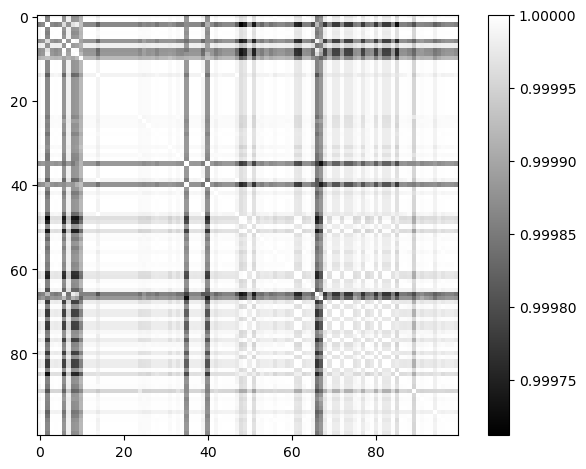

In [33]:
plt.imshow(np.corrcoef(W, rowvar=False), 'gray')
plt.colorbar()
plt.tight_layout()
# plt.savefig('/Users/waqas/Desktop/nmfson_results/jasper_small/correlation_matrix.png')

In [34]:
unique_idxs = []
other_idxs = [x for x in range(r) if x not in unique_idxs]

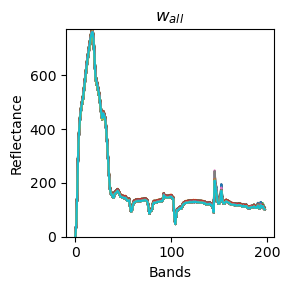

In [39]:
wmin, wmax = np.min(W), np.max(W)


fig, ax = plt.subplots(1, 1, figsize=(3, 3))

ax.set_xlabel('Bands')
ax.set_ylabel('Reflectance')
ax.set_ylim([min(0, wmin), wmax])

ax.plot(W[:, other_idxs])
ax.set_title('$w_{{all}}$')

# Adjust layout and display plot
plt.tight_layout()
plt.savefig(f'../final_results/jasper_small_2_overlapped.png')

In [35]:
# sum
hsum = H[other_idxs, :].sum(axis=0, keepdims=True)
wsum = W[:, other_idxs].sum(axis=1, keepdims=True)

new_W = np.hstack((W[:, unique_idxs], wsum))
new_H = np.vstack((H[unique_idxs, :], hsum))